## Scatter  plots

To plot relationships between quantitative variables. The strengh of the relationship can be mesured, e.g. with Pearson correlation coefficient.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
## Allows to render plots inlie
%matplotlib inline

fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


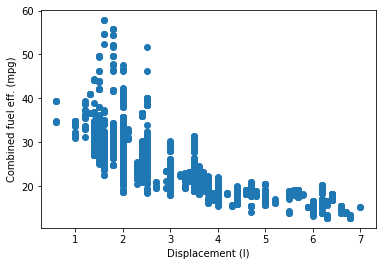

In [8]:
plt.scatter(data = fuel_econ,
           x = 'displ',
           y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

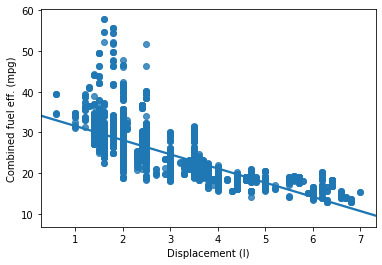

In [9]:
## with seaborn, a regression line is added (fit_reg = false to turn it off)
sb.regplot(data = fuel_econ,
           x = 'displ',
           y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

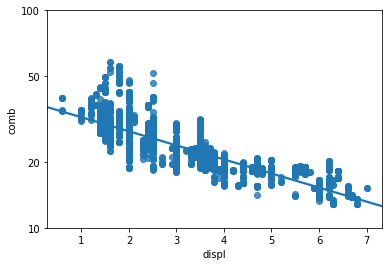

In [10]:
## To transform the scale of the axis:

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, transparency, and jitter

There are cases where are too many points in small area or variable is discrete in nature. In such cases it could be difficult to interprete a simple scatterplot. There are, however, some techniques to solve this:
* sampling: selecting a random (smaller) sample of the data points
* transparency: adding transparency to the points, such that the overall plot will be darker when points are closer to each other
* jitter: if variables are discrete, some random noise can be added to the points. In this way congregation of data points can be visualized.

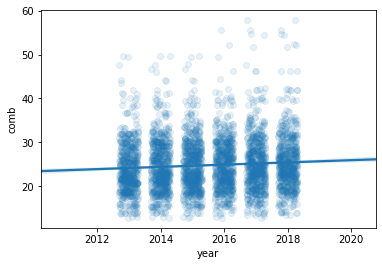

In [16]:
sb.regplot(data= fuel_econ
          , x = "year"
          , y = 'comb'
          , x_jitter = 0.3 ## only works in seaborn
          , scatter_kws = {'alpha' : 1/10});

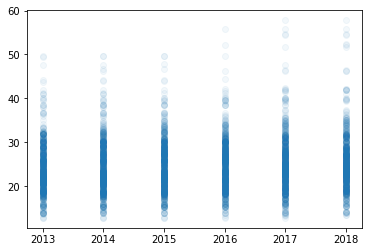

In [17]:
## In matplotlib
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);